In [2]:
n_threads = 4
from multiprocessing import Process, Lock, Pool
def f(l, i):
    l.acquire()
    print 'hello world', i
    l.release()

lock = Lock()
for num in range(n_threads):
    Process(target=f, args=(lock, num)).start()

hello world 0
hello world 1
hello world 2
hello world 3


In [13]:
n_threads = 4
from multiprocessing import Process, Lock, Manager

result = []
counter = 0

def f(l, n):
    global result, counter
    
    o = range(10*n, 10*n + 10)
    l.acquire()
    print n, "|", o
    result += o
    l.release()

    
manager = Manager()
lock = Lock()
for num in range(n_threads):
    p = Process(target=f, args=(lock, num)).start()
    
print result

0 | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[]
1 | [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
2 | [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
3 | [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [14]:
n_threads = 4
from threading import Thread, Lock

result = []
counter = 0

def f(l, n):
    global result, counter
    
    o = range(10*n, 10*n + 10)
    l.acquire()
    print n, "|", o
    result += o
    l.release()

    
manager = Manager()
lock = Lock()
for num in range(n_threads):
    t = Thread(target=f, args=(lock, num)).start()
    
print result

0 | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1 | [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
2 | [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
3 | [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [1]:
import numpy as np


In [15]:
m1 = np.random.normal(5, 2, 1000)
m2 = np.random.normal(5, 2, 1000)
m3 = m1 + m2
mu = 5 + 5
sigma = np.sqrt(2**2 + 2**2)

In [16]:
import matplotlib.pylab as plt
%matplotlib inline

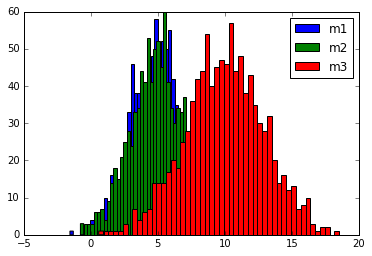

In [17]:
plt.figure()
_ = plt.hist(m1, bins=50, label='m1')
_ = plt.hist(m2, bins=50, label='m2')
_ = plt.hist(m3, bins=50, label='m3')
plt.legend()

In [20]:
print np.mean(m3), np.std(m3, ddof=1), mu, sigma

9.95653884386 2.91652482367 10 2.82842712475


In [21]:
print abs(mu - np.mean(m3))
print abs(sigma - np.std(m3, ddof=1))

0.0434611561431
0.08809769892


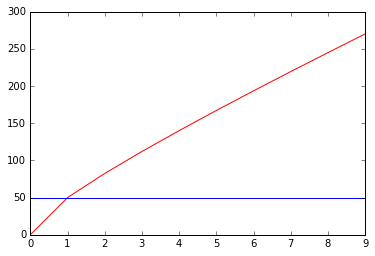

In [35]:
mu = 20
sigma = 10
n = np.arange(0,10)
A = 50
y = mu*n + 3*sigma*np.sqrt(n)
plt.figure()
plt.plot(n, y, '-r')
plt.plot(n, A*np.ones_like(y), '-b')

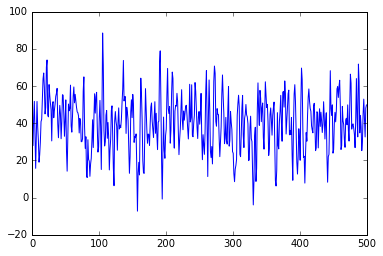

In [37]:
m1 = np.random.normal(mu, sigma, 1000)
n = 2
y = [np.sum(m1[i:i+n]) for i in range(500)]
plt.plot(y)

In [33]:
def compute_normal_identical(mu, sigma, a=50):
    """
    Solve n*mu + 3*sigma*sqrt(n) < a
    return: n, Mu, Sigma
    """
    for n in range(100):
        y = mu*n + 3.0*sigma*np.sqrt(n)
        if y > a:
            break  
    n -= 1
    m = n*mu
    s = sigma*np.sqrt(n)
    return n, m, s


print compute_normal_identical(5, 2, 50)
print compute_normal_identical(1, 0.3, 50)
print compute_normal_identical(20, 10, 50)
print compute_normal_identical(10, 5, 50)

(6, 30, 4.8989794855663558)
(44, 44, 1.9899748742132397)
(1, 20, 10.0)
(2, 20, 7.0710678118654755)


In [39]:
m1 = 47 * np.random.beta(0.5, 0.5, 1000)
m2 = 47 * np.random.beta(0.5, 0.5, 1000)
m3 = m1 + m2

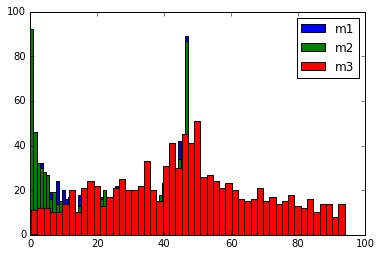

In [40]:
plt.figure()
_ = plt.hist(m1, bins=50, label='m1')
_ = plt.hist(m2, bins=50, label='m2')
_ = plt.hist(m3, bins=50, label='m3')
plt.legend()

### Hill-Climbing

In [1]:
from search import Node, Problem

In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

(-25, 150)

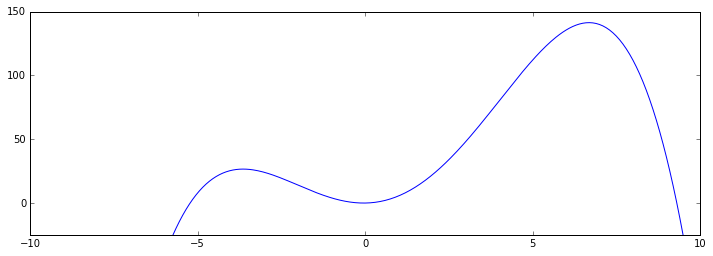

In [36]:
x = np.arange(-10.0, 10.0, 0.05)

def foo(x):
    return 5.5 * x**2 - 0.1 * (x - 1)**4

y = foo(x)

plt.figure(figsize=(12,4))
plt.plot(x, y)
plt.ylim([-25, 150])

In [37]:
#
# Find out max of a function : y = 5.5 * x**2 - 0.1 * (x - 1)**4
# 

class TestProblem(Problem):
        
    def actions(self, state):
        """Return a list of actions executable in this state."""
        return [0.05, -0.05]

    def result(self, state, action):
        """The state that results from executing this action in this state."""
        return state + action

#     def is_goal(self, state):
#         """True if the state is a goal."""
#         return state in self.goals  # Optionally override this!

#     def step_cost(self, state, action, result=None):
#         """The cost of taking this action from this state."""
#         return 1  # Override this if actions have different costs

    def value(self, state):
        """For optimization problems, each state has a value.  Hill-climbing
        and related algorithms try to maximize this value."""
        return foo(state)    

In [58]:
import math
import random
import sys

def exp_schedule(k=20, lam=0.005, limit=1000):
    """One possible schedule function for simulated annealing"""
    return lambda t: (k * math.exp(-lam * t) if t < limit else 0)


def probability(p):
    """Return true with probability p."""
    return p > random.uniform(0.0, 1.0)


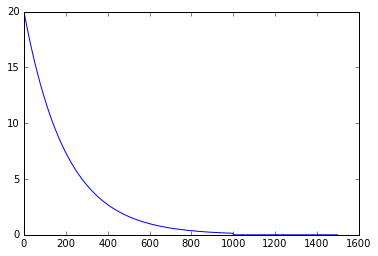

In [59]:
index = range(1500)
f = exp_schedule()
vals = list([0]*1500)
for i in index:
    vals[i] = f(i)
    
plt.figure()
plt.plot(index, vals)

In [60]:
problem = TestProblem(initial=-5)
schedule = exp_schedule()
current = Node(problem.initial)

count = 0

for t in range(10000000):
    T = schedule(t)
    print(t, T)
    if T == 0:
        print("- current: ", current)
        break
    neighbors = current.expand(problem)
    print("-> Neighbors: ", neighbors)
    if not neighbors:
        print("-- current: ", current)
        break 
    next = random.choice(neighbors)
    delta_e = problem.value(next.state) - problem.value(current.state)
    print("-> delta_e: ", delta_e, "probability(math.exp(delta_e / T)): ", probability(math.exp(delta_e / T)))
    if delta_e > 0 or probability(math.exp(delta_e / T)):
        print("-> current: ", current)
        current = next

    count += 1
#     if count == 15:
#         break

(0, 20.0)
('-> Neighbors: ', [<Node -4.95: 1>, <Node -5.05: 1>])
('-> delta_e: ', 1.5300493750000044, 'probability(math.exp(delta_e / T)): ', True)
('-> current: ', <Node -5: 0>)
(1, 19.900249583853647)
('-> Neighbors: ', [<Node -4.9: 2>, <Node -5.0: 2>])
('-> delta_e: ', 1.451340624999986, 'probability(math.exp(delta_e / T)): ', True)
('-> current: ', <Node -4.95: 1>)
(2, 19.800996674983363)
('-> Neighbors: ', [<Node -4.85: 3>, <Node -4.95: 3>])
('-> delta_e: ', 1.3744093749999848, 'probability(math.exp(delta_e / T)): ', True)
('-> current: ', <Node -4.9: 2>)
(3, 19.70223879206125)
('-> Neighbors: ', [<Node -4.8: 4>, <Node -4.9: 4>])
('-> delta_e: ', 1.2992406249999817, 'probability(math.exp(delta_e / T)): ', True)
('-> current: ', <Node -4.85: 3>)
(4, 19.603973466135105)
('-> Neighbors: ', [<Node -4.75: 5>, <Node -4.85: 5>])
('-> delta_e: ', -1.2992406249999817, 'probability(math.exp(delta_e / T)): ', True)
('-> current: ', <Node -4.8: 4>)
(5, 19.506198240566654)
('-> Neighbors: ', [

In [64]:
foo(-3.65), foo(-3.7)

(26.52049937499997, 26.498189999999994)

In [65]:
from scipy.optimize import basinhopping

In [68]:
def foo(x):
    return -5.5 * x**2 + 0.1 * (x - 1)**4

minimizer_kwargs = {"method": "BFGS"}
ret = basinhopping(foo, -5, minimizer_kwargs=minimizer_kwargs, niter=200)
print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

global minimum: x = 6.6865, f(x0) = -141.3375


### Check implementation of class FrontierPQ:

In [10]:
import numpy as np
from search import FrontierPQ, Node

In [17]:
initial_state = tuple([0]*9)
initial_node = Node(initial_state)
print initial_node

<Node (0, 0, 0, 0, 0, 0, 0, 0, 0): 0>


In [18]:
costfn=lambda node: node.path_cost
frontier = FrontierPQ(initial_node, costfn)

In [19]:
frontier.heap

[(0, <Node (0, 0, 0, 0, 0, 0, 0, 0, 0): 0>)]

In [20]:
def get_child(node):
    child_state = list(node.state)
    action = np.random.randint(9)
    child_state[action] += 1 
    return Node(tuple(child_state), node, action, 1)

In [37]:
child = get_child(initial_node)
frontier.add(child)
frontier.heap

[(0, <Node (0, 0, 0, 0, 0, 0, 0, 0, 0): 0>),
 (1, <Node (0, 0, 0, 0, 1, 0, 0, 0, 0): 1>),
 (2, <Node (0, 1, 0, 0, 1, 0, 0, 0, 0): 2>),
 (1, <Node (0, 0, 0, 0, 0, 1, 0, 0, 0): 1>),
 (1, <Node (0, 0, 0, 0, 0, 0, 0, 0, 1): 1>),
 (2, <Node (0, 0, 0, 0, 0, 0, 1, 0, 1): 2>),
 (3, <Node (0, 0, 0, 0, 0, 0, 2, 0, 1): 3>),
 (1, <Node (0, 0, 0, 0, 1, 0, 0, 0, 0): 1>),
 (2, <Node (0, 1, 0, 0, 0, 1, 0, 0, 0): 2>),
 (3, <Node (0, 1, 0, 0, 1, 1, 0, 0, 0): 3>),
 (4, <Node (0, 2, 0, 0, 1, 1, 0, 0, 0): 4>),
 (5, <Node (0, 2, 0, 0, 1, 2, 0, 0, 0): 5>),
 (6, <Node (0, 2, 0, 0, 2, 2, 0, 0, 0): 6>),
 (7, <Node (0, 2, 0, 0, 2, 2, 0, 1, 0): 7>),
 (8, <Node (0, 3, 0, 0, 2, 2, 0, 1, 0): 8>),
 (3, <Node (0, 1, 1, 0, 1, 0, 0, 0, 0): 3>)]

In [38]:
child = get_child(child)
frontier.add(child)
frontier.heap

[(0, <Node (0, 0, 0, 0, 0, 0, 0, 0, 0): 0>),
 (1, <Node (0, 0, 0, 0, 1, 0, 0, 0, 0): 1>),
 (2, <Node (0, 1, 0, 0, 1, 0, 0, 0, 0): 2>),
 (1, <Node (0, 0, 0, 0, 0, 1, 0, 0, 0): 1>),
 (1, <Node (0, 0, 0, 0, 0, 0, 0, 0, 1): 1>),
 (2, <Node (0, 0, 0, 0, 0, 0, 1, 0, 1): 2>),
 (3, <Node (0, 0, 0, 0, 0, 0, 2, 0, 1): 3>),
 (1, <Node (0, 0, 0, 0, 1, 0, 0, 0, 0): 1>),
 (2, <Node (0, 1, 0, 0, 0, 1, 0, 0, 0): 2>),
 (3, <Node (0, 1, 0, 0, 1, 1, 0, 0, 0): 3>),
 (4, <Node (0, 2, 0, 0, 1, 1, 0, 0, 0): 4>),
 (5, <Node (0, 2, 0, 0, 1, 2, 0, 0, 0): 5>),
 (6, <Node (0, 2, 0, 0, 2, 2, 0, 0, 0): 6>),
 (7, <Node (0, 2, 0, 0, 2, 2, 0, 1, 0): 7>),
 (8, <Node (0, 3, 0, 0, 2, 2, 0, 1, 0): 8>),
 (3, <Node (0, 1, 1, 0, 1, 0, 0, 0, 0): 3>),
 (2, <Node (0, 0, 0, 0, 1, 0, 0, 1, 0): 2>)]

In [49]:
print frontier.pop()

<Node (0, 0, 0, 0, 0, 0, 2, 0, 1): 3>


In [39]:
import heapq
heapq??

In [4]:
import sys
sys.path.append('../common')
from utils import weight3 as weight_fn, weight_by_index
from utils import bag_weight, score, mean_n_sigma, score_stats
from utils import MAX_WEIGHT, AVAILABLE_GIFTS, GIFT_TYPES, N_TYPES, N_BAGS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [139]:
index = 1
weights = np.array([weight_by_index(index) for i in range(10000)])
hist = np.histogram(weights, bins=2*MAX_WEIGHT)

In [140]:
pdf = hist[0] *1.0 / np.sum(hist[0])
x = hist[1][:-1]

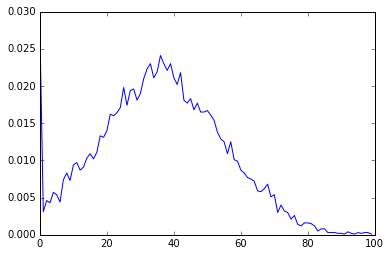

In [141]:
plt.plot(pdf)

In [142]:
def find_n(pdf, x, epsilon=0.1):
    for n in range(1, 1000):
        y = MAX_WEIGHT * 1.0 / n
        res = np.where(x > y)[0]
        if len(res) > 0:
            index = res[0]
            pr = np.sum(pdf[index:])
            if pr > epsilon:
                return n-1
            
n = find_n(pdf, x, epsilon=0.32)
print n

2


In [148]:
np.sum(weights * n > MAX_WEIGHT), np.sum(weights * n > MAX_WEIGHT) * 1.0 / len(weights)

(6300, 0.63)

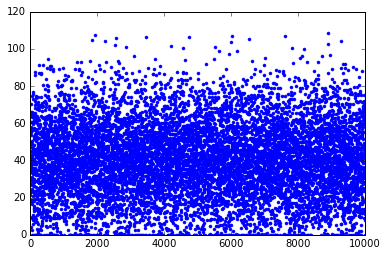

In [144]:
plt.plot(weights * n, '.')

In [145]:
nweights = weights.copy()
nweights[weights * n > MAX_WEIGHT] = 0.0
np.sum(nweights * n) * 1.0 / len(nweights), np.sum(nweights * n), np.sum(weights * n > MAX_WEIGHT) * 1.0 / len(weights)

(20.745953499411005, 207459.53499411006, 0.30509999999999998)

In [147]:
n += 1
nweights = weights.copy()
nweights[weights * n > MAX_WEIGHT] = 0.0
np.sum(nweights * n) * 1.0 / len(nweights), np.sum(nweights * n), np.sum(weights * n > MAX_WEIGHT) * 1.0 / len(weights)

(10.936228272588203, 109362.28272588202, 0.63)

In [136]:
n += 1
nweights = weights.copy()
nweights[weights * n > MAX_WEIGHT] = 0.0
np.sum(nweights * n) * 1.0 / len(nweights), np.sum(nweights * n), np.sum(weights * n > MAX_WEIGHT) * 1.0 / len(weights)

(10.815224883212837, 108152.24883212837, 0.64000000000000001)

### 5 bags of gifts. 5 types gifts. Weights from 1 to 5

Mean bag weight 2
Total weight of 5 bags : 10

Another random filling gives bag weights : 0, 1, 2, 3, 4, 5 with uniform distribution

In [22]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


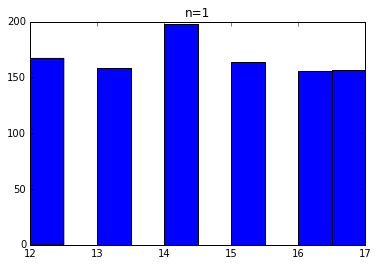

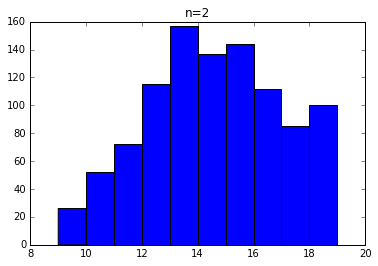

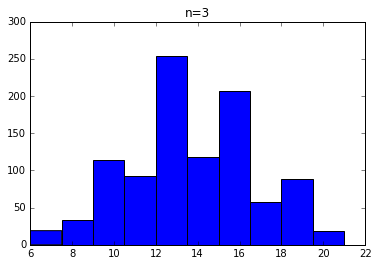

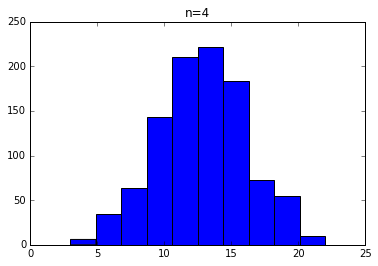

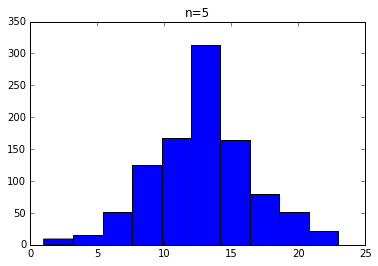

In [27]:
for n in range(1, 6):
    weights = list([0]*1000)
    for j in range(len(weights)):
        bag = [3,3,3,3,3]
        for i in range(n):
            bag[i] = np.random.randint(6)
        w = sum(bag)
        weights[j] = w
    plt.figure()
    plt.title("n=%i" % n)
    plt.hist(weights)
        

In [28]:
sum([i * 1.0/6.0 for i in range(1,7)])

3.5

### Example 

```
[x][x][x][x][x]
```
x = {3, uniform_random(1,6)}. 
If sum of x's is less than 15 - lose 

In [29]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [89]:
n_trials = 1000
for n in range(5):
    trials = 3.0*np.ones((n_trials, 5))
    for i in range(n_trials):
        for j in range(n):
            trials[i, j] = np.random.randint(6) + 1
    s = np.sum(trials, axis=1)
    total = np.sum(trials)
    n_wins = np.sum(s > 15)
    n_loses = np.sum(s <= 15)
    print n, n_wins, n_loses, total

0 0 1000 15000.0
1 488 512 15454.0
2 535 465 15768.0
3 627 373 16553.0
4 698 302 17284.0


In [80]:
np.sum(trials)

17155.0